# Data evaluatuion

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import astropy.units as u
import numpy as np

In [10]:
# standard colors
color_cv = 'k'
color_ms = 'blue'
color_msK = 'red'
color_redox = 'green'
color_sim = 'green' # basically the same 

current_cv = 'current1_muA_geo'
current_ms = 'xxx' # which?
current_msK = 'sim_current'
current_redox = 'current_H_sub'

# plot parameters
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 8
#plt.axes.titlesize: 30

# conversion of cm to inch.
# Required to set the figure sizes
def cm_to_inch(cm):
    "Converts cm to inch"
    from astropy import units as u
    return (cm * u.cm).to(u.imperial.inch).value

In [11]:
electrode_radius = 5 * u.mm
electrode_area =  (np.pi * electrode_radius**2).to(u.cm**2)


def read_SXRD(file):
    """Returns a dataframe with a corrected offset"""    
    df = pd.read_csv(file, sep='\t', header=3).iloc[14:-5]
    offset = df['Intensity'].iloc[:5].mean()
    df['Intensity_norm'] = df['Intensity'] - offset
    df['E'] = df['Eana'] + 0.21
    df['Iana_geo'] = df['Iana'] / electrode_area.value
    return df

# Article plots

## main article SXRD comparison

The CVs were recorded with a factor 10

In [12]:
import astropy.units as u
import numpy as np

# standard colors
color_cv = 'k'
color_ms = 'blue'
color_msK = 'red'
color_redox = 'green'
color_sim = 'green' # basically the same 

current_cv = 'current1_muA_geo'
current_ms = 'xxx' # which?
current_msK = 'sim_current'
current_redox = 'current_H_sub'

# plot parameters
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 7
#plt.axes.titlesize: 30

# conversion of cm to inch.
# Required to set the figure sizes
def cm_to_inch(cm):
    "Converts cm to inch"
    from astropy import units as u
    return (cm * u.cm).to(u.imperial.inch).value

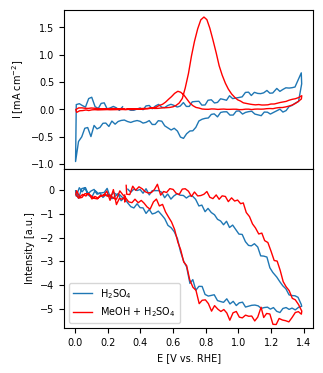

In [13]:
cv = '../data/SXRD\\scan317.txt'
meoh = '../data/SXRD\\scan769.txt'

factor = 1

fig, [ax0, ax1] = plt.subplots(2,1, figsize=(cm_to_inch(8),cm_to_inch(9.5)), sharex=True)
# CV
# read_SXRD(cv).plot('E','Iana', ax=ax0, label='H$_2$SO$_4$')
cvdf = read_SXRD(cv)
cvdf['Iana_geo_10'] = cvdf['Iana_geo'] / factor
cvdf.plot('E','Iana_geo_10', ax=ax0, label='H$_2$SO$_4$')
read_SXRD(meoh).plot('E','Iana_geo', ax=ax0, label='MeOH +  H$_2$SO$_4$', color='red')
# SXRD 1 0 2.35
read_SXRD(cv).plot('E','Intensity_norm', ax=ax1, label='H$_2$SO$_4$')
read_SXRD(meoh).plot('E','Intensity_norm', ax=ax1, label='MeOH + H$_2$SO$_4$', color='red')

ax0.legend().remove()
ax1.set_ylim(-5.8, 0.9)

ax0.set_ylabel('I [mA cm$^{-2}$]')
ax1.set_ylabel('Intensity [a.u.]')
ax1.set_xlabel('E [V vs. RHE]')
plt.subplots_adjust(hspace=0, top=0.98, right=0.98, bottom=0.13, left=0.19)

plt.savefig('../Figures/article_engs2022/SXRD/sxrd_MeOH_vs_CV.png', dpi=500, facecolor='white')


## SI with different UPL

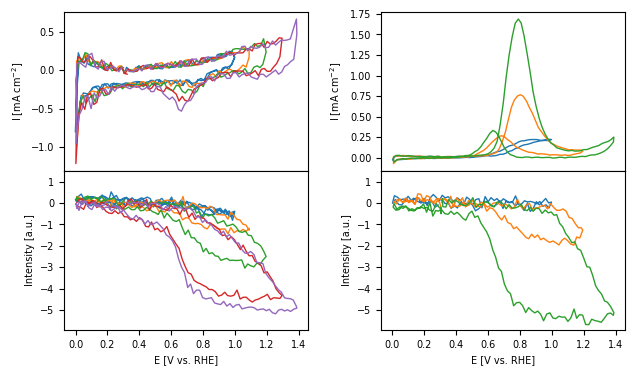

In [14]:
# 300 CV, 700 MeOH
# ['../data/SXRD\\scan769.txt',
#  '../data/SXRD\\scan313.txt',
#  '../data/SXRD\\scan763.txt',
#  '../data/SXRD\\scan757.txt',
#  '../data/SXRD\\scan317.txt',
#  '../data/SXRD\\scan310.txt',
#  '../data/SXRD\\scan306.txt',
#  '../data/SXRD\\scan302.txt']

cvs = [ '../data/SXRD\\scan302.txt',
       '../data/SXRD\\scan306.txt',
       '../data/SXRD\\scan310.txt',
 '../data/SXRD\\scan313.txt',
 '../data/SXRD\\scan317.txt',
      ]


meohs = ['../data/SXRD\\scan757.txt',
    '../data/SXRD\\scan763.txt',
    '../data/SXRD\\scan769.txt',
        ]

cv = '../data/SXRD\\scan317.txt'
meoh = '../data/SXRD\\scan769.txt'

factor = 1

fig, axis = plt.subplots(2,2, figsize=(cm_to_inch(16),cm_to_inch(9.5)), sharex=True)

[[ax0, ax1],[ax2,ax3]] = axis
# CV
# read_SXRD(cv).plot('E','Iana', ax=ax0, label='H$_2$SO$_4$')

# ax1.sharey(ax0)
for cv in cvs:
    cvdf = read_SXRD(cv)
    cvdf['Iana_geo_10'] = cvdf['Iana_geo'] / factor
    cvdf.plot('E','Iana_geo_10', ax=ax0, label='H$_2$SO$_4$', legend=False)

for meoh in meohs:
    read_SXRD(meoh).plot('E','Iana_geo', ax=ax1, label='MeOH +  H$_2$SO$_4$', legend=False)

# SXRD 1 0 2.35
for cv in cvs:
    read_SXRD(cv).plot('E','Intensity_norm', ax=ax2, label='H$_2$SO$_4$', legend=False)

for meoh in meohs:    
    read_SXRD(meoh).plot('E','Intensity_norm', ax=ax3, label='MeOH + H$_2$SO$_4$', legend=False)

ax0.legend().remove()
# ax1.set_ylim(-5.8, 0.9)
for ax in [ax0, ax1]:
    ax.set_ylabel('I [mA cm$^{-2}$]')

for ax in [ax2, ax3]:
    ax.set_ylabel('Intensity [a.u.]')
    ax.set_xlabel('E [V vs. RHE]')
    ax.set_ylim(-5.9,1.5)
    
plt.subplots_adjust(hspace=0, wspace=0.3, top=0.98, right=0.98, bottom=0.13, left=0.09)

plt.savefig('../Figures/article_engs2022/SXRD/SI_sxrd_MeOH_vs_CV.png', dpi=500, facecolor='white')
